In [36]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

dat_path=('/home/maria/Downloads/natimg2800_M170717_MP033_2017-08-20.mat')
mat = scipy.io.loadmat(dat_path)
im_path='/home/maria/Downloads/images_natimg2800_all.mat'
im2800=scipy.io.loadmat(im_path)['imgs']

In [13]:
resp=mat['stim']['resp'][0][0]

In [14]:
resp.shape

(6956, 10145)

In [19]:
im=mat['stim']['istim'][0][0]

In [16]:
im.shape

(6956, 1)

In [24]:
print(im2800)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Jul 16 12:03:52 2018', '__version__': '1.0', '__globals__': [], 'imgs': array([[[129, 132, 132, ..., 129, 127, 126],
        [127, 133, 165, ..., 132, 116, 113],
        [125, 133, 187, ..., 135, 102, 104],
        ...,
        [148, 160, 129, ..., 151, 130, 127],
        [146, 149, 127, ..., 136, 133, 129],
        [135, 136, 125, ..., 129, 131, 132]],

       [[127, 133, 125, ..., 131, 127, 126],
        [121, 135, 167, ..., 139, 119, 110],
        [119, 136, 189, ..., 146, 107, 102],
        ...,
        [152, 160, 137, ..., 163, 130, 118],
        [147, 149, 132, ..., 139, 132, 125],
        [136, 136, 126, ..., 133, 131, 133]],

       [[126, 133, 120, ..., 132, 128, 127],
        [118, 137, 141, ..., 143, 119, 112],
        [116, 138, 196, ..., 154, 108, 104],
        ...,
        [157, 161, 139, ..., 176, 129, 116],
        [151, 149, 134, ..., 164, 131, 130],
        [139, 136, 127, ..., 142, 130, 134]],



(68, 270, 2800)


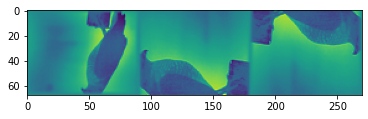

In [53]:
print(im2800.shape)
plt.imshow(im2800[:,:,1])

In [62]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25861 sha256=5a5f532826ee950c4a8e228d0229fe1c3647bda680cf89f767bba0db15ee6615
  Stored in directory: /home/maria/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


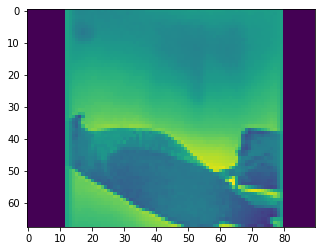

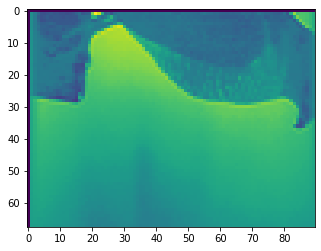

In [66]:
import cv2
import imutils
#Second image
image2 = imutils.rotate(im2800[:,:,1][:,:90], 270)
print(image)
# Displaying the image
plt.imshow(image)
plt.show()
image3=imutils.rotate(im2800[:,:,1][:,90:180],180)
plt.imshow(image3)

In [43]:
images=im2800.transpose((2,0,1))
#images=im2800.reshape((2800,270,68))

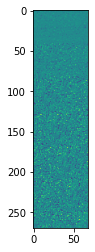

In [44]:
plt.imshow(images[0])